<details>
   <summary>Metadata</summary> 
    title: "E-TRAINEE Research-oriented case study: Multitemporal 3D change analysis at an active rock glacier"<br>
    description: "This is the sixth theme within the 3D/4D Geographic Point Cloud Time Series Analysis module."<br>
    dateCreated: 2023-03<br>
    authors: Vivien Zahs, Katharina Anders<br>
    contributors: Bernhard Höfle, Sina Zumstein<br>
    estimatedTime: 1.5 hrs<br>
</details>

# Case study: Multitemporal 3D change analysis at an active rock glacier

In this case study, multitemporal point clouds acquired at different timescales (bi-weekly to annually) and from different sensors and platforms (UAV-borne laser scanning and photogrammetry, terrestrial laser scanning) are used to assess surface changes on an active rock glacier. Throughout the case study, you will learn about:

* <a href="#detection-of-surface-change-over-different-timespans">Detection of surface change over different timespans</a>
* <a href="#change-detection-at-small-magnitudes-under-consideration-of-uncertainties">Change detection at small magnitudes under consideration of uncertainties</a>
* <a href="#observation-of-rock-glacier-processes-using-multi-source-point-clouds">Observation of rock glacier processes using multi-source point clouds</a>
* <a href="#interpretation-of-geomorphic-change-using-multi-sensor-surface-and-subsurface-information">Interpretation of geomorphic change using multi-sensor surface and subsurface information</a>

Most parts are theoretical based on published research that relates to the case study, parts of the methods will be performed interactively (in the Jupyter notebook by you).

After finishing this theme you will be able to:
* understand the relevance and challenges of rock glacier observation as a setting of complex topographic structure and dynamics
* assess surface changes with different approaches to increase the confidence of change detection
* differentiate benefits of different data sources and point cloud properties for topographic monitoring.


## Study area and data

Before you continue, **get familiar with the use case**: [Multitemporal and multi-sensor observation of the active rock glacier _Äußeres Hochebenkar_ (Austria)](../../data_usecases/usecase_rockglacier_ahk.md).

**... and read the key paper accompanying the use case and case study:** 
>Hartl, L., Zieher, T., Bremer, M., Stocker-Waldhuber, M., Zahs, V., Höfle, B., Klug, C. & Cicoira, A. (2023): Multisensor monitoring and data integration reveal cyclical destabilization of Äußeres Hochebenkar Rock Glacier. Earth Surface Dynamics. Vol. 11, pp. 117-147. DOI: [10.5194/esurf-11-117-2023](https://doi.org/10.5194/esurf-11-117-2023).

For interactive parts in the case study, we will use two epochs of annual point clouds subsampled to 10 cm point spacing (to reduce the required computing capacity). For this, use the dataset `ahk` from the course data repository. As the rock glacier is being observed with long-term and extensive 3D acquisitions, the major part of the case study and research will be presented in a theoretical manner. Nonetheless, data and methods are mostly openly available and linked in the respective sections if you would like to try them out yourselves!

<a id='getting-started-with-the-data'></a>
## Getting started with the data (interactive session)

In the first step, we will set up the Python environment and load the data for the analysis steps shown interactively throughout this case study. If you are following the session hands-on (highly recommended), you need to adapt the path to the data and continue using the `etrainee` Python environment of the course. For explanations on the procedure to read in the py4dgeo `Epoch` object and running the M3C2 algorithm, look into [theme 3 of this module](../03_3d_change_analysis/03_3d_change_analysis.ipynb).

In [4]:
# import required modules
import os
import py4dgeo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# add the script assets folder to the path, so that we can import the functions created there
import sys
from pathlib import Path
sys.path.insert(0, str((Path.cwd() / ".." / ".." / "assets" / "python_functions").resolve()))

# import point cloud functions
import pointcloud_functions as pcfuncs

# specify the data path
data_dir = 'path-to-data'

# check if the data path exists
if not os.path.exists(data_dir):
    raise Exception('Data path does not exist. Please make sure to specify the correct path.')

# derive the file paths and read in the data
pc_file_2020 = f'{data_dir}/ahk_2020_uls.laz'
pc_file_2021 = f'{data_dir}/ahk_2021_uls.laz'

# read the point clouds into numpy arrays
#pc_2020 = pcfuncs.read_las(pc_file_2020)
#pc_2021 = pcfuncs.read_las(pc_file_2021)

You know the surface change analysis of the rock glacier from the [exercise in theme 3 of this module](../03_3d_change_analysis/exercise/m3_theme3_exercise1_solution1.ipynb). So we will just repeat this analysis here to obtain the distance and uncertainty information from the M3C2 algorithm. As registration error, we use the value of 3.7 cm as assessed in the exercise.

In [ ]:
# load epochs into py4dgeo objects
epoch2020 = py4dgeo.read_from_las(pc_file_2020)
epoch2021 = py4dgeo.read_from_las(pc_file_2021)

# use every nth point as core point for distance calculation
corepoints = epoch2020.cloud[::100]

# instantiate and parametrize the M3C2 algorithm object
m3c2 = py4dgeo.M3C2(
    epochs=(epoch2020, epoch2021),
    corepoints=corepoints,
    normal_radii=(4.0, 0.5, 6.0),
    cyl_radii=(0.5,),
    max_distance=(15.0),
    registration_error=0.037
)

# run the algorithm
m3c2_distances, uncertainties = m3c2.run()

We visualize the changes, and based on these results, continue with the case study by first looking into the importance of timescales for the observation of rock glacier deformation.

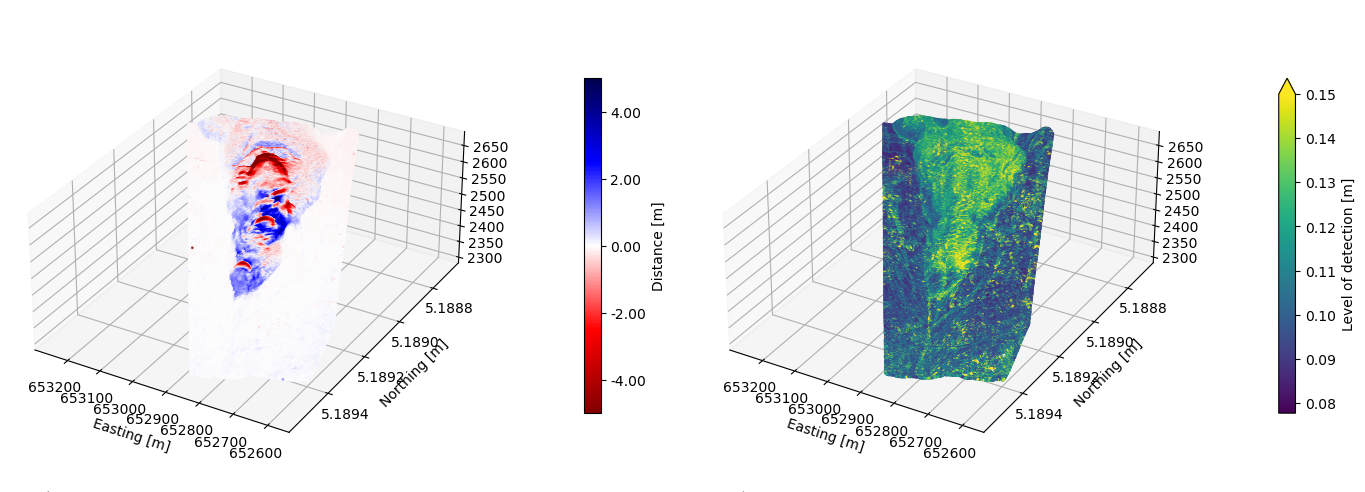

In [7]:
# create the figure
fig, axs = plt.subplots(1, 2, figsize=(14,7), subplot_kw={"projection": "3d"})
(ax1,ax2) = axs

# plot the distances
d = ax1.scatter(corepoints[:,0], corepoints[:,1], corepoints[:,2], c=m3c2_distances, cmap='seismic_r', vmin=-5.0, vmax=5.0, s=1) 
plt.colorbar(d, format=('%.2f'), label='Distance [m]', ax=ax1, shrink=.5, pad=.15)

# plot the level of detection values
l = ax2.scatter(corepoints[:,0], corepoints[:,1], corepoints[:,2], c=uncertainties['lodetection'], cmap='viridis', vmax=0.15, s=1) 
plt.colorbar(l, format=('%.2f'), label='Level of detection [m]', ax=ax2, extend='max', shrink=.5, pad=.15)

# add plot elements
for ax in axs:
    ax.set_xlabel('Easting [m]')
    ax.set_ylabel('Northing [m]')
    ax.set_aspect('equal')
    ax.view_init(elev=30., azim=120.)

plt.axis('equal')
plt.tight_layout()
plt.show()

<a id='detection-of-surface-change-over-different-timespans'></a>
## Detection of surface change over different timespans

In this case study, we have two annual point clouds available, acquired in summer of each year, respectively (see visualization of change above). However, rock glacier deformation is a result of multiple processes that occur over different timespans. Even if we are aware of the different possible processes, we are not able to attribute how much of the observed surface change was caused, for example, by seasonal thaw, by rock glacier creep, or by movement of individual boulders. The study of <a href="#references">Ulrich et al. (2021)</a> demonstrates the benefit of more frequent 3D monitoring to separate surface change types that occur at different timescales related to active rock glacier deformation.

The study uses data acquired of the rock glacier _Äußeres Hochebenkar_ with terrestrial laser scanning at sub-monthly intervals, i.e. acquired over a timespan of three weeks in the summer season of 2018. 3D surface changes across the rock glacier are derived as relative contribution of the three-week timespan to annual surface change since the previous year (2017 to 2018). Changes are further separated according to their directions. Change directions on the rock glacier are spatially variable, depending on the underlying process, and mainly occur either perpendicular to the local rock glacier surface or along the main direction of rock glacier flow.

This analysis revealed that the contribution of the three-week timespan to the annual change perpendicular to the surface is 20\%, compared with 6\% in the direction of rock glacier
flow. The figure below visualizes the surface changes derived for each timespan. We observe a certain degree of surface increase which can be attributed to mass accumulation and thickening affecting both periods. There is, however, a higher portion of negative change in the three-week period, indicating that surface lowering is more active in this timespan during summer. 

Envision the contribution of the shorter timespan like this: If the rate of surface lowering derived in the three-week period would apply throughout the entire year, surface lowering would be four times higher than actually observed. The other way around, if we only observe change at annual timespans, the activity and contribution of this process in the summer season is strongly underestimated - as the change rate would be spread as average across a full year. Using the approach of <a href="#references">Ulrich et al. (2021)</a>, estimates of surface change (in different directions) are obtained that are dominant at different times of the year - read the paper to learn more about the disaggregation of surface changes at the rock glacier!

<center>
<img src="media/m3_theme6_ulrich_etal.png" alt="AHK_methods" title="Change detection Ulrich et al. 2021" width="700">

<i>Comparison of surface changes perpendicular to local surface orientation in the lower tongue area of the _Äußeres Hochebenkar_ rock glacier computed with the M3C2 algorithm for
(a) the three-week timespan and (b) the one-year timespan. Figure by <a href="https://doi.org/10.5194/esurf-9-19-2021">Ulrich et al. (2021)</a> / [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).</i>
</center>

Observing surface activities at smaller timescales implies that derived surface changes are of much lower magnitude - depending on the respective change rates. While these smaller change magnitudes help us to identify corresponding objects (e.g., boulders) or processes (e.g. surface lowering separated from creep), they also require us to be able to confidently detect small-scale changes. The following section presents methods accounting for exactly this in the context of research of our case study.

<a id='change-detection-at-small-magnitudes-under-consideration-of-uncertainties'></a>
## Change detection at small magnitudes under consideration of uncertainties

The ability to quantify small-magnitude change with low uncertainties becomes particularly important in settings where relevant surface changes are small and the frequency of
monitoring is high to be adapted to the change rates of the monitored surface. Appropriate frequencies of acquisition and relevant magnitudes of change thereby depend on the
dynamics of the observed phenomenon.

At the rock glacier, surface changes occur at different change rates and may be of very small magnitudes (centimeter scale) especially if acquisition intervals are small (sub-monthly). To confidently detect changes, i.e. deriving them as significant, we require methods that reduce associated uncertainties, on the one hand, and account for uncertainties as good as possible on the other hand. If you would like to revisit uncertainties in change analysis and the assessment of the level of detection in the M3C2, look into [theme 3 of this module](../03_3d_change_analysis/03_3d_change_analysis.ipynb).

The methods and analysis of rock glacier changes in this section center around the **assumption of the M3C2 that surfaces are locally planar**. Let's first have a look at the level of detection, which is derived as a combination of surface roughness, point sampling, and the registration error. A non-planar or even curved surface will yield a high roughness value which increases the level of detection value even though the change between surfaces may be real and even distinct: 

<center>
<img src="media/m3_theme6_lod_winiwarter.png" alt="LOD_drawbacks" title="" width="700">

<i>Influence of surface geometry on the level of detection derived with the M3C2 algorithm, leading to a lower detectability of change where the planarity assumption does not hold. Figure by L. Winiwarter, following <a href="https://doi.org/10.1016/j.isprsjprs.2021.06.011">Winiwarter et al. (2021)</a>/ [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).</i>
</center>

The limitation of the level of detection calculation here is that it is derived in a purely data-driven manner (and thereby quite powerful). But by including knowledge about the local geometry, survey geometry, and sensors, we are actually able to more rigorously account for the uncertainty in change analysis at each 3D point location. Therefore, a method was developed by <a href="#references">Winiwarter et al. (2021)</a>, who extend the M3C2 algorithm with **error propapagation** (M3C2-EP).
M3C2-EP quantifies the uncertainty for each point in a point cloud by propagating the uncertainty of the measurements themselves (e.g., sensor accuracy) and of the alignment uncertainty to the 3D points. This allows the 3D covariance information to be calculated for the point cloud, which is used in an extended statistical test for equality of multivariate means. By this, the M3C2-EP gives a less biased estimate of the level of detection, allowing a more appropriate significance threshold in typical cases.

The method was applied to terrestrial laser scans of the rock glacier _Äußeres Hochebenkar_ at two different timespans (three weeks and one year).
Over the three-week period, significant change was detected at 12.5% fewer 3D locations, while quantifying additional 25.2% of change volume, when compared to the standard M3C2 method [Lague et al. (2013)](#references). M3C2-EP further allows the combination of data from multiple scan positions or data sources with different levels of uncertainty. 

<center>
<img src="media/m3_theme6_m3c3_ep.png" alt="AHK_methods" title="Change detection M3C2-EP" width="700">

<i>3D view of the LoDetection for the Äußeres Hochebenkar rock glacier. Left: M3C2. Center: M3C2-EP. Right: Differences between the two. The top row shows the
one-year timespan from 2017 to 2018, the bottom row the three-week timespan in 2018. The difference is taken as baseline LoDetection minus LoDetection-EP. Figure by <a href="https://doi.org/10.1016/j.isprsjprs.2021.06.011">Winiwarter et al. (2021)</a> / [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).</i>
</center>

_Note: The M3C2-EP method is available in development stage in [py4dgeo](https://github.com/3dgeo-heidelberg/py4dgeo). You may test it yourself by setting up the py4dgeo in development mode (see installation instructions on GitHub), and using the test data (terrestrial laser scans of the rock glacier) provided in the corresponding py4dgeo test data repository. Stay tuned for the next release, the method will soon be fully available and integrated as interactive analysis in this case study!_

If you are interested in the full datasets, they are available [here](https://doi.org/10.11588/data/XHYB10) as published with <a href="#references">Winiwarter et al. (2021)</a>.


Another method to increase the detectability of changes in complex topography is provided with the **correspondence-driven plane-based M3C2** developed by <a href="#references">Zahs et al. (2022b)</a>. This approach targets the planarity assumption in M3C2 change analysis by making full use of it: change is calculated between planes, that are explicitly extracted and determined as corresponding between two epochs. This ensures that surfaces are excluded if they exhibit high roughness (scale- and application-dependent!), and that only corresponding surfaces are compared. In this context, think back of the importance of timescales above. If the surface changed a lot between acquisitions, the two epochs of local surfaces compared by the M3C2 may not actually represent the same objects or features. Alternatively, we may of course identify objects - for example individual boulders on the rock glacier surface - for [object-based change analysis](../03_3d_change_analysis/03_3d_change_analysis.ipynb). However, identifying objects in natural scenes is not trivial as they occur in many different variations and are also often not fully or well represented in the point cloud. For the rock glacier, you experienced yourselves in the data how boulders occur at variable sizes and shapes, and how they are narrowly placed and only covered by the point cloud at the non-occluded surfaces.

Therefore, the correspondence-driven plane-based M3C2 does not require recognition or reconstruction of geometrically complex objects but instead quantifies change between less complex, homologous planar surfaces. The method consists of the following main steps:
1) Extraction of planar surfaces in point clouds of successive epochs
2) Identification of corresponding planar surfaces between two point clouds using a binary random forest classification
3) Calculation of M3C2 distances and the associated uncertainty between the corresponding planar surfaces

<center>
<img src="media/m3_theme6_cd_pb_m3c2.png" alt="AHK_methods" title="Change detection CD-PB-M3C2" width="700">

<i>Overview of the correspondence-driven plane-based M3C2 approach to quantify change between homologous planar areas and the associated uncertainty based on point clouds of two
epochs. Figure by V. Zahs, following <a href="https://doi.org/10.1016/j.isprsjprs.2021.11.018">Zahs et al. (2022b)</a>.
 </i>
</center>

Thereby, the method is tailored to quantifying 3D topographic change of rough surfaces at smaller magnitudes by reducing the uncertainty of quantified change. The approach further allows to relate change directly to a moving object, even if the change is not oriented in the direction of the surface.

In their study, <a href="#references">Zahs et al. (2022b)</a> apply the correspondence-driven M3C2 to a bi-weekly time series of terrestrial laser scanning point clouds acquired at the _Äußeres Hochebenkar_ rock glacier. The method enables a sevenfold reduction in the uncertainty associated with topographic change compared to standard M3C2. Significant change was therefore detected in around 75% of the area of change analysis, whereas the standard M3C2 detects significant change in only 16% (2-week timespan) to 60% (10-week timespan) of the same area.

_Note: The correspondence-driven plane-based M3C2 method is available in development stage in [py4dgeo](https://github.com/3dgeo-heidelberg/py4dgeo). You may test it yourself by setting up the py4dgeo in development mode (see installation instructions on GitHub), using the data of the rock glacier from this course. Stay tuned for the next release, the method will soon be fully available and integrated as interactive analysis in this case study!_

If you are interested in the full datasets, they are available [here](https://doi.org/10.11588/data/TGSVUI) as published with <a href="#references">Zahs et al. (2022b)</a>.

<a id='observation-of-rock-glacier-changes-using-multi-source-point-clouds'></a>
## Observation of rock glacier changes using multi-source point clouds

The research on the rock glacier presented so far has made use of terrestrial laser scanning point clouds. But as you already know from the course, UAV-borne acquisitions are available. These acquisitions have been conducted at the _Äußeres Hochebenkar_ since the summer of 2018, to extend the observation at the rock glacier by these more recent survey strategies. Point clouds derived from UAV-borne laser scanning and UAV-borne photogrammetry provide new opportunities for 3D topographic monitoring in geographic research. The airborne
acquisition strategy overcomes common challenges of ground-based techniques, such as limited spatial coverage or heterogeneous measurement distribution, and allows flexible
repeated acquisitions at high temporal and spatial resolution. While UAV-borne 3D sensing techniques are expected to thereby enhance geographic observation, an important question is how well they are suited for 3D change analysis of complex natural surfaces, such as the rock glacier.

<a href="#references">Zahs et al. (2022a)</a> have assessed point clouds originating from **UAV-borne laser scanning (ULS) and photogrammetry** as input for 3D topographic change analysis at the rock glacier _Äußeres Hochebenkar_. 
Surface change was analyzed by using ULS and photogrammetric point clouds of two years (2019 and 2021) as input for the M3C2
algorithm (<a href="#references">Lague et al., 2013</a>) and the correspondence-driven plane-based M3C2 (<a href="#references">Zahs et al., 2022b</a>). ULS-based and photogrammetry-based change analysis are evaluated regarding their performance in (1) achieving high spatial coverage of derived changes, (2) accurately quantifying magnitude and uncertainty of change, and (3) detecting significant change (change magnitudes > associated uncertainty). Terrestrial laser scanning (TLS) surveys undertaken simultaneously with the UAV-borne acquisitions are used as reference for change analysis.

The study shows the improved spatial coverage of M3C2 achieved with point clouds acquired with UAVs (60% increase of core points used for change analysis). For the correspondence-driven plane-based M3C2, UAV-borne point clouds enabled a spatially more uniform distribution of plane pairs used for change quantification and a slightly higher spatial coverage (7% increase of core points used
for change analysis) compared to the TLS reference. Magnitudes of M3C2 change were closer to the TLS reference for change analysis between two ULS acquisitions (mean difference: 0.04 m; std. dev.: 0.05 m) compared to analysis between ULS and photogrammetric acquisitions (mean difference: 0.12 m; std. dev.: 0.08 m). Magnitudes of change were above the associated uncertainty in 82% to 89% of the area of change analysis.

<center>
<img src="media/m3_theme6_multisource1.png" alt="AHK_multisource" title="Change detection multi source point clouds" width="800">

<i>Results of surface change analysis using point clouds derived from terrestrial laser scanning (TLS), UAV-borne
laser scanning (ULS), and UAV-borne photogrammetry using dense image matching (DIM) as input. Spatial coverage (a) - (c),
LoDetection (d) - (f), magnitudes of surface change (g) - (i), and significance of surface change (j) - (l) are shown on top of a hillshade
derived from airborne laser scanning data. Figure by <a href="https://doi.org/10.5194/isprs-archives-XLIII-B2-2022-1109-2022">Zahs et al. (2022a)</a> / [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).
 </i>
 </center>

These results demonstrate the potential of UAV-borne point clouds from different sensing strategies for accurate 3D topographic change analysis. Though the accuracy is lower than for terrestrial laser scanning, there are clear advantages of these survey strategies: In the complex surface geometry of the rock glacier, a higher coverage can be achieved by the airborne perspective of the UAVs. Moreover, a larger area (in the future maybe even the entire rock glacier) can be covered by the acquisition. This strongly reduces the effort (i.e. cost) of data acquisition. In continuous, long-term observation of the rock glacier, the optimal solution will most likely be a combination of different sensing strategies (terrestrial, UAV-borne, laser scanning, photogrammetry, ...) at different timescales.

**Your turn**: As you have a ULS and a photogrammetric point cloud available with the data of this course, go ahead and look into the M3C2 change analysis with different point cloud sources: How do the results differ when analyzing change between ULS to ULS compared to ULS to photogrammetry? Consider different aspects of the py4dgeo M3C2 result, such as the change (`distances`) and level of detection (`lodetection`) values, but also the point density and surface roughness (`num_samples2` and `spread2` of the compared ULS and photogrammetry point clouds in the returned `uncertainties`).

<!--- implement interactive analysis: comparing ULS-ULS to ULS-photogrammetry? --->

You have now learnt a lot about survey strategies and methods evolving around the rock glacier case study, enabling enhanced monitoring and new insights about surface processes. In the following section, we will look into the actual interpretation of rock glacier processes at the _Äußeres Hochebenkar_ with insights from recent research.

<a id='interpretation-of-geomorphic-processes-using-multi-sensor-surface-and-subsurface-information'></a>
## Interpretation of geomorphic processes using multi-sensor surface and subsurface information

The interpretation of geomorphic change and underlying processes at the rock glacier benefits from the integration of multi-sensor surface and subsurface information, such as geophysical measurements using electrical resistivity tomography (ERT).

<a href="#references">Hartl et al. (2023)</a> realize this by using the interdisciplinary, long-term, continuous, and high-resolution monitoring strategies available at the rock glacier _Äußeres Hochebenkar_. This enables to improve process understanding and model development related to rock glacier rheology and deformation.

A main focus of observation at the rock glacier is on its **kinematics and destabilization**, investigated by <a href="#references">Hartl et al. (2023)</a>. 

The unique in-situ and remote-sensing-based monitoring network at the _Äußeres Hochebenkar_ is used by consolidating, homogenizing, and extending the available time series of multi-sensor surface observations, thereby generating a comprehensive dataset including:
* 14 digital surface models (from historical aerial imagery and airborne and UAV-borne laser scanning) covering a 68-year time period
* in-situ measurements of block displacement since the early 1950s,
* high-resolution airborne and UAV laser scanning point clouds at annual temporal resolution from 2017 to 2021
* terrestrial laser scanning point clouds collected in bi-weekly intervals during the summer of 2019 at the rock glacier front.

Movement and change information derived from the combination of these datasets reveal two cycles of destabilization in the lower section of the rock glacier (find an animation
[here](https://doi.org/10.5446/60175). The first cycle lasted from the early 1950s until the mid-1970s. The second cycle began around 2017 after approximately two decades of more gradual
acceleration and is currently ongoing. Both destabilization periods are characterized by high velocities and the development of morphological destabilization features on the
rock glacier surface. Acceleration in the most recent years has been very pronounced, with velocities reaching 20 to 30 m per year in 2020 to 2021. These rates are unprecedented in the
time series and suggest highly destabilized conditions in the lower section of the rock glacier, which shows signs of translational and rotational landslide-like movement.

<center>
<img src="media/m3_theme6_multi_sensor_hartl_etal.png" alt="AHK_methods" title="Change detection multi-sensor data" width="700">

<i>Velocity vectors (m/a) for the time series of digital surface models, plotted over hillshades of the later digital surface model of each consecutive pair. Reference lines defining block profiles P0–P3 have been added for orientation purposes. Figure by <a href="https://doi.org/10.5194/esurf-11-117-2023">Hartl et al. (2023)</a> / [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).
 </i>
</center>

In <a href="#references">Zahs et al. (2019)</a>, the interpretation of 3D topographic surface change at the rock glacier _Äußeres Hochebenkar_ has been supported by electrical resistivity tomography (ERT) data of the subsurface. The combination of topographic point clouds and ERT data allowed to assess the influences of **thaw-related deformation processes**. It becomes visible that areas of
negative surface changes are related to the presence of subsurface ice. These measurements at two profiles fit the expectation that the degree of thawing processes depend strongly upon the rock glacier's internal composition.

<center>
<img src="media/m3_theme6_multi_sensor_zahs.png" alt="AHK_methods" title="Change detection multi-sensor data", width="800">

<i>Overview map and ERT profiles of the investigated study site in the lower tongue area of the Äußeres Hochebenkar rock glacier. (a)
Locations of terrestrial laser scanning positions, stable rock walls and ERT profile lines. (b)
Model of the near subsurface electrical resistivity distribution along ERT profile 1 and (c) deduced interpretation sketch. Figure by V. Zahs, following <a href="https://doi.org/10.1002/ppp.2004">Zahs et al. (2019)</a>.
 </i>
</center>

Due to the constraint of the [ERT technique](https://wiki.seg.org/wiki/Electrical_resistivity_tomography) that stakes must have full contact to the ground material, more extensive measurements on the rock glacier itself are hardly possible. As you can see in the map above, the ERT profiles are therefore located at the edge of the rock glacier, where fine material can be reached near the surface. It is hence especially valuable being able to relate surface deformation to subsurface conditions. If we are able to derive a good explanation, i.e. model, of the relation between 3D topographic observations and other survey methods, comprehensive observation of rock glacier processes is enabled with targeted surveying.

Continued high-resolution monitoring of the rock glacier is also important to assess the hazard potential of the rock glacier in the destabilized lower sections. Single rock falls from the rock glacier front are already occurring and have affected the road below. It might even be possible that the rock glacier front collapses, with rapid mass movement as a consequence (<a href="#references">Hartl et al., 2023</a>). The likelihood of a collapse, following <a href="#references">Hartl et al. (2023)</a> can however not be predicted with the current lack of information on the composition of the rock glacier, i.e. subsurface data.

<a id='references'></a>
## References

* Hartl, L., Zieher, T., Bremer, M., Stocker-Waldhuber, M., Zahs, V., Höfle, B., Klug, C. & Cicoira, A. (2023): Multisensor monitoring and data integration reveal cyclical destabilization of Äußeres Hochebenkar Rock Glacier. Earth Surface Dynamics. Vol. 11, pp. 117-147. doi: [10.5194/esurf-11-117-2023](https://doi.org/10.5194/esurf-11-117-2023).
* Lague, D., Brodu, N., & Jeroux, J. (2013): Accurate 3D comparison of complex topography with terrestrial laser scanner: Application to the Rangitikei canyon (N-Z). ISPRS Journal of Photogrammetry and Remote Sensing, 82 (2013), pp. 10-26. doi: [10.1016/j.isprsjprs.2013.04.009](https://doi.org/10.1016/j.isprsjprs.2013.04.009).
* Ulrich, V., Williams, J.G., Zahs, V., Anders, K., Hecht, S. & Höfle, B. (2021): Measurement of rock glacier surface change over different timescales using terrestrial laser scanning point clouds. Earth Surface Dynamics. Vol. 9, pp. 19-28. doi: [10.5194/esurf-9-19-2021](https://doi.org/10.5194/esurf-9-19-2021). 
* Williams, J.G., Anders, K., Winiwarter, L., Zahs, V. & Höfle, B. (2021): Multi-directional change detection between point clouds. ISPRS Journal of Photogrammetry and Remote Sensing. Vol. 172, pp. 95-113. doi: [10.1016/j.isprsjprs.2020.12.002](https://doi.org/10.1016/j.isprsjprs.2020.12.002). 
* Winiwarter, L., Anders, K. & Höfle, B. (2021): M3C2-EP: Pushing the limits of 3D topographic point cloud change detection by error propagation. ISPRS Journal of Photogrammetry and Remote Sensing, 178, pp. 240–258. doi: [10.1016/j.isprsjprs.2021.06.011](https://doi.org/10.1016/j.isprsjprs.2021.06.011). 
* Zahs, V., Hämmerle, M., Anders, K., Hecht, S., Rutzinger, M., Sailer, R., Williams, J.G. & Höfle, B. (2019): Multi-temporal 3D point cloud-based quantification and analysis of geomorphological activity at an alpine rock glacier using airborne and terrestrial LiDAR. Permafrost and Periglacial Processes. Vol. 30 (3), pp. 222-238. doi: [10.1002/ppp.2004](https://doi.org/10.1002/ppp.2004).
* Zahs, V., Winiwarter, L., Anders, K., Bremer, M. Rutzinger, M. Potůčková, M. & Höfle, B. (2022a): Evaluation of UAV-borne photogrammetry and UAV-borne laser scanning for 3D topographic change analysis of an active rock glacier. International Archives of the Photogrammetry, Remote Sensing and Spatial Information Sciences. Vol. XLIII-B2-2022, pp. 1109-1116. doi: [10.5194/isprs-archives-XLIII-B2-2022-1109-2022](https://doi.org/10.5194/isprs-archives-XLIII-B2-2022-1109-2022). 
* Zahs, V., Winiwarter, L., Anders, K., Williams, J.G., Rutzinger, M. & Höfle, B. (2022b): Correspondence-driven plane-based M3C2 for lower uncertainty in 3D topographic change quantification. ISPRS Journal of Photogrammetry and Remote Sensing. Vol. 183, pp. 541-559. doi: [10.1016/j.isprsjprs.2021.11.018](https://doi.org/10.1016/j.isprsjprs.2021.11.018).